In [1]:
from __future__ import print_function
import numpy as np
from time import time 

In [2]:
# random data với số dữ liệu = N và số chiều = d
d, N = 1000, 10000
X = np.random.rand(N, d)
z = np.random.rand(d)
print(X[1].shape)

(1000,)


In [3]:
# z là 1 điểm dữ liệu
# 2 hàm tích khoảng cách giữa 1 điểm dữ liệu với tập data train
def dist_pp(z, x):
    d = z - x.reshape(z.shape)
    return np.sum(d*d)

def dist_pp_naive(z, X):
    N = X.shape[0]
    res = np.zeros((1, N))
    for i in range(N):
        res[0][i] = dist_pp(z, X[i])
#     print(res.shape)
    return res
def dist_pp_fast(z, X):
    x2 = np.sum(X*X, 1)
    z2 = np.sum(z*z)
#     print(x2.shape)
    return x2 + z2 - 2*X.dot(z)

In [4]:
#  Đo thời gian của 2 cách tính với 1 điểm dữ liệu mới 
t1 = time()
D2 = dist_pp_fast(z, X)
print(D2)
print('time = ', time()-t1, 's')

t1 = time()
D1 = dist_pp_naive(z, X)
print(D1)
print('time =', time()-t1, 's')

[175.58061234 165.38466392 170.74065773 ... 162.24562468 168.61745237
 173.76062358]
time =  0.08041572570800781 s
[[175.58061234 165.38466392 170.74065773 ... 162.24562468 168.61745237
  173.76062358]]
time = 0.19055438041687012 s


In [5]:
# Z là một tập điểm dữ liệu mới với số lượng = M, số chiều = d
M = 100
Z = np.random.rand(M, d)

def dist_ss(Z, X):
    M = Z.shape[0]
    N = X.shape[0]
    res = np.zeros((M, N))
    for i in range(M):
        res[i] = dist_pp_fast(Z[i], X)
    return res

def dist_ss_fast(Z, X):
    X2 = np.sum(X*X, 1)
    Z2 = np.sum(Z*Z, 1)
    print(X2.shape)
    print(X2.reshape(1, -1))
    return Z2.reshape(-1, 1) + X2.reshape(1, -1) -2*Z.dot(X.T)

In [6]:
# Đo thời gian chạy của 2 cách tích khoảng cách với tập dữ liệu mới Z
t1 = time()
D3 = dist_ss(Z, X)
# print(D3.shape)
print(D3)
print('time = ', time()-t1, 's')

t1 = time()
D4 = dist_ss_fast(Z, X)
print(D4)
print('time = ', time()-t1, 's')

[[154.86132587 170.06279043 159.3751328  ... 171.34143281 172.25476436
  179.81132809]
 [155.24410462 164.02004844 160.52306553 ... 165.92291455 160.69000845
  170.66231567]
 [158.65199021 170.94678372 171.00844657 ... 171.00249887 163.28676363
  171.65078753]
 ...
 [158.79640157 170.92971666 163.81623933 ... 162.55720399 177.28181847
  170.05503696]
 [151.49988538 170.60927985 150.72293796 ... 173.29041886 166.68919305
  163.54077913]
 [158.59783157 169.11460779 153.60980609 ... 163.54512388 165.50460151
  170.37478122]]
time =  7.16582179069519 s
(10000,)
[[319.58775399 343.87462188 308.76701464 ... 340.48242853 328.08330345
  352.72711232]]
[[154.86132587 170.06279043 159.3751328  ... 171.34143281 172.25476436
  179.81132809]
 [155.24410462 164.02004844 160.52306553 ... 165.92291455 160.69000845
  170.66231567]
 [158.65199021 170.94678372 171.00844657 ... 171.00249887 163.28676363
  171.65078753]
 ...
 [158.79640157 170.92971666 163.81623933 ... 162.55720399 177.28181847
  170.05503

In [7]:
#  lấy k điểm gần với mỗi điểm dữ liệu đang xét nhất
k = 10
idx = np.argpartition(D4, k)
print(idx)
print(idx[:, :k])

[[5500 6813 8040 ... 9997 9998 9999]
 [9022 3425 9740 ...   16   12 9999]
 [1865 5319 9505 ...    5    3 4999]
 ...
 [2114 5698 8027 ... 9997 9998 9999]
 [8258 1198 8666 ... 9997 9998 4999]
 [2335 4482 1302 ... 9997 9998 9999]]
[[5500 6813 8040 2141 6126 5844 3026 5803 2862 8431]
 [9022 3425 9740 1779 5794 9802 4753 2876 2730 2465]
 [1865 5319 9505 9249 8336 2833  455  289 2266 3285]
 [4965  257  161 3468 6570 3453 4442 4459 2455 4736]
 [5261 3538 4365 9537 7152 5417 6052 3130 6139 1861]
 [3334 7679 9118 9552 5509 4498 8731  946 2161 5699]
 [2358 3945 5768  320 8730  921 1566 8067 9384 3056]
 [3240 8879  603 2241 4149 1006 4734 9213 5974 5170]
 [2378 9667 3672 4537 2581 7632 6367 3087 6577 4275]
 [7175 7648 5393 4774 2258 1519 1908 2724 1183 3451]
 [4801 6621 9269 4895 7502 1779 3439 1599 5533 3384]
 [3203 8434 8784 6317 3758  760 8848 7983 4339 8148]
 [2574  529 6041 4153 7350 3173 6376 1448 9105 6238]
 [9332 9268  775 7960  965 6195 1960 7435 1273  190]
 [7990  520   32 6776 4250 178

In [8]:
# cách tìm kiếm k tối ưu cho thuật toán kNN
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('/home/fakerpbc/data/datakNN.csv', header=0)
data.head(10)

a    b   c   d    e     f      g   h  j
0   6  148  72  35    0  33.6  0.627  50  1
1   1   85  66  29    0  26.6  0.351  31  0
2   8  183  64   0    0  23.3  0.672  32  1
3   1   89  66  23   94  28.1  0.167  21  0
4   0  137  40  35  168  43.1  2.288  33  1
5   5  116  74   0    0  25.6  0.201  30  0
6   3   78  50  32   88  31.0  0.248  26  1
7  10  115   0   0    0  35.3  0.134  29  0
8   2  197  70  45  543  30.5  0.158  53  1
9   8  125  96   0    0   0.0  0.232  54  1

In [10]:
# chuẩn hoá dữ liệu 
df = data
def normalize(data):
    minx = data.min()
    maxx = data.max(0)
    scaled = (data - minx) / (maxx - minx)
    return scaled

In [11]:
df = df[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']].apply(normalize)
df = df.assign(j = data['j'])
df.head(10)

a         b         c         d         e         f         g  \
0  0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1  0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2  0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3  0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4  0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
5  0.294118  0.582915  0.606557  0.000000  0.000000  0.381520  0.052519   
6  0.176471  0.391960  0.409836  0.323232  0.104019  0.461997  0.072588   
7  0.588235  0.577889  0.000000  0.000000  0.000000  0.526080  0.023911   
8  0.117647  0.989950  0.573770  0.454545  0.641844  0.454545  0.034159   
9  0.470588  0.628141  0.786885  0.000000  0.000000  0.000000  0.065756   

          h  j  
0  0.483333  1  
1  0.166667  0  
2  0.183333  1  
3  0.000000  0  
4  0.200000  1  
5  0.150000  0  
6  0.083333  1  
7  0.133333  0  
8  0.533333  1  
9  0.550000  1

In [12]:
train, test = train_test_split(df, test_size=0.3, random_state=0, stratify=df['j'])
x_train = train[train.columns[0:8]]
y_train = train[train.columns[-1]]

x_test = test[test.columns[0:8]]
y_test = test[test.columns[-1]]

X = df[df.columns[0:8]]
Y = df['j']
print(X[:10])
print(Y[:10])

          a         b         c         d         e         f         g  \
0  0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1  0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2  0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3  0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4  0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
5  0.294118  0.582915  0.606557  0.000000  0.000000  0.381520  0.052519   
6  0.176471  0.391960  0.409836  0.323232  0.104019  0.461997  0.072588   
7  0.588235  0.577889  0.000000  0.000000  0.000000  0.526080  0.023911   
8  0.117647  0.989950  0.573770  0.454545  0.641844  0.454545  0.034159   
9  0.470588  0.628141  0.786885  0.000000  0.000000  0.000000  0.065756   

          h  
0  0.483333  
1  0.166667  
2  0.183333  
3  0.000000  
4  0.200000  
5  0.150000  
6  0.083333  
7  0.133333  
8  0.533333  
9  0.550000  
0    1
1    0
2    1

In [13]:
k_number = np.array([1, 3, 5, 7, 9])
scores_test = []
scores_train = []
for i in k_number:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores1 = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy', n_jobs=20)
#     print(scores1)
    scores_train.append(scores1.mean())
    
    scores2 = cross_val_score(knn, x_test, y_test, cv=10, scoring='accuracy', n_jobs=20)
    scores_test.append(scores2.mean())

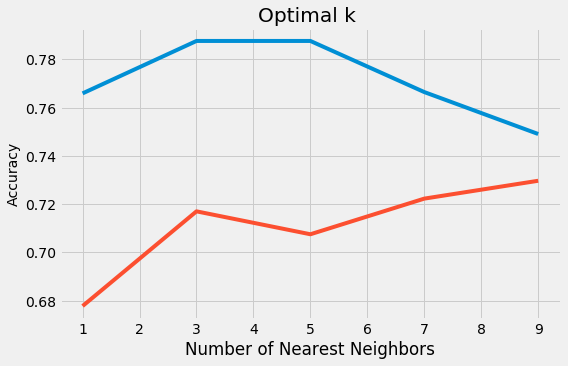

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
plt.plot(k_number, scores_test, label='Accuracy test')
plt.plot(k_number, scores_train, label='Accuracy train')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Number of Nearest Neighbors')
plt.title('Optimal k ')
plt.show()